In [55]:
%run ./Functions_All.ipynb

In [56]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000
v_redmass = np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)
print(rel_len(x_1, x_2), rel_len(v_1, v_2))

N = 3 # Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH', DL=True)[1]
positions_LUC = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'LUC', DL=True)[1]
# print(positions[2])

#~1 min at res=1e5

1000.0 0.031624357700987385


In [57]:
V_eff_EIH = (TotalEnergy(s, mode = 'EIH')[1])

sunRestMass = (M_sun*c**2).to('J')

print(f'V_eff_EIH = {V_eff_EIH/sunRestMass:.3e} M_sun*c**2 = {V_eff_EIH:.3e}')


V_eff_EIH = -5.596e-48 1 / J M_sun*c**2 = -1.000e+00


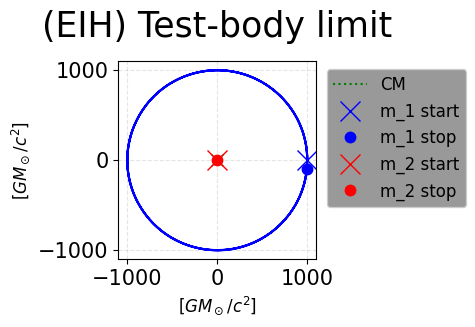

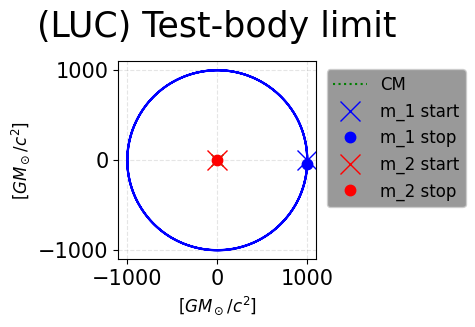

In [58]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_EIH, CM = True, xlim=lim, ylim=lim, filename='(EIH) Test-body limit', figsize=(5,5), save=False)
orbPlotter(positions_LUC, CM = True, xlim=lim, ylim=lim, filename='(LUC) Test-body limit', figsize=(5,5), save=False)

## 2) Testbody limit w/ Johans initial conditions with eccentricity

In [59]:
%run ./Functions_All.ipynb
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000


α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

V_eff_EIH = (TotalEnergy(s, mode = 'EIH')[1])
print(f'V_eff_EIH = {V_eff_EIH/(M_sun*c**2):.4e} M_sun*c**2 = {V_eff_EIH:.4e}')


N =  α*6# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH', DL=True)[1]
positions_LUC = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'LUC', DL=True)[1]
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

V_eff_EIH = -5.5962e-48 s2 / (kg m2) M_sun*c**2 = -1.0001e+00


C:\Users\Productivity\AppData\Local\Temp\ipykernel_24104\2281194048.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


In [60]:
eccOutput_EIH = eccentricity(positions_EIH[0])
print(f'meanEccentricity_EIH = {eccOutput_EIH[0]:.3f}')

meanEccentricity_EIH = 0.736


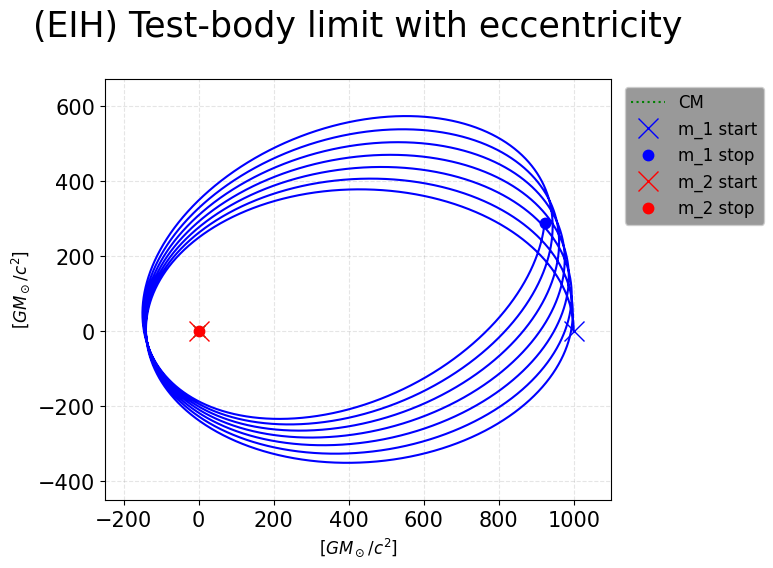

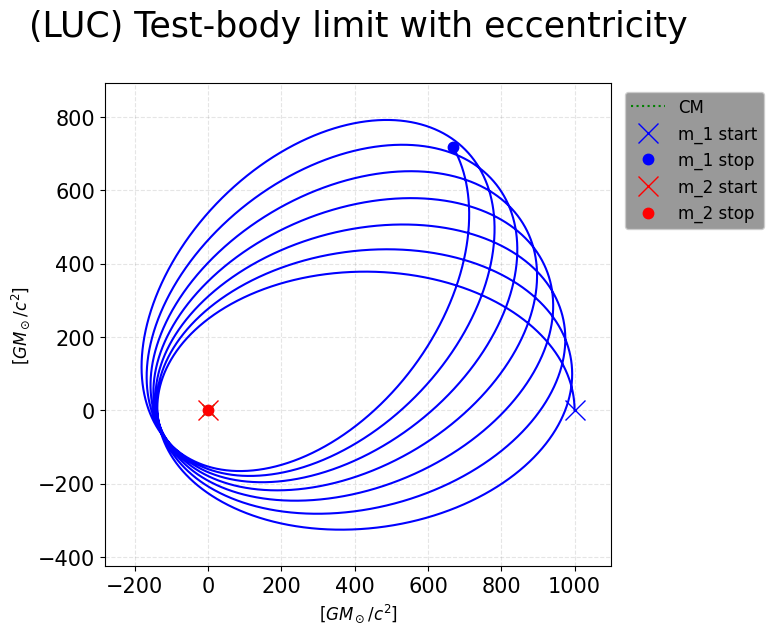

In [61]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_EIH, CM = True, xlim=lim, ylim=lim, filename='(EIH) Test-body limit with eccentricity', save=False)
orbPlotter(positions_LUC, CM = True, xlim=lim, ylim=lim, filename='(LUC) Test-body limit with eccentricity', save=False)


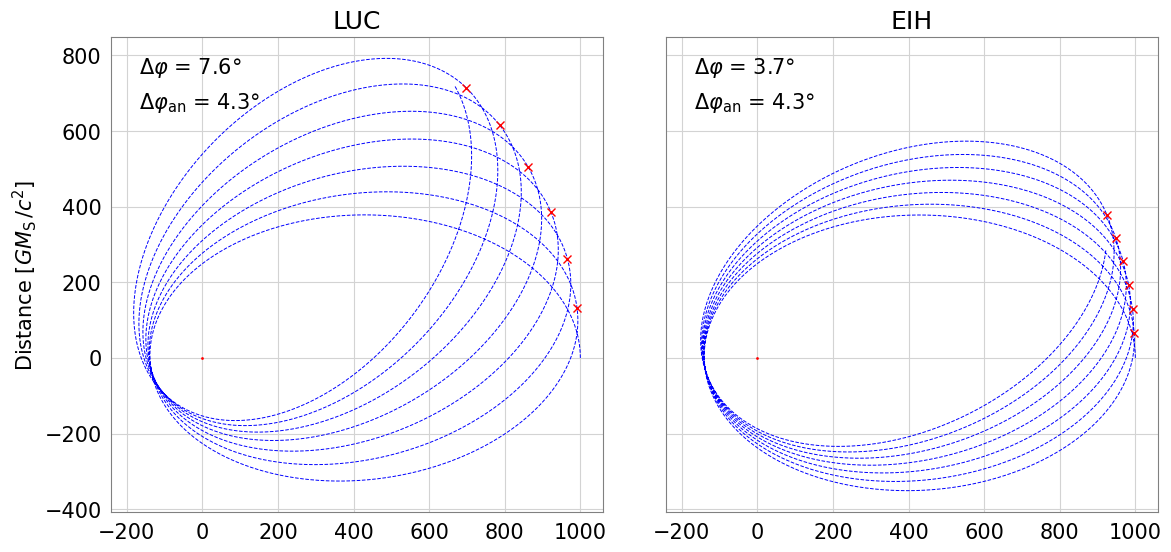

In [62]:
φ_EIH_an = perihelionShift_analytical(s, DL=True, mode='EIH')

rs_EIH, peakIndices_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0])
rs_LUC, peakIndices_LUC, peakPositions_LUC, peakAngles_LUC, perihelionShift_LUC = perihelionShift(positions_LUC[0]) 
   

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,12), sharex = True, sharey = True)

axs[0].set_aspect('equal')
axs[0].plot(positions_LUC[0,0], positions_LUC[0,1], 'b--', lw=0.7)
axs[0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_LUC*180/np.pi:.1f}°')
axs[0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_EIH_an:.1f}°')
axs[0].plot(0,0,'r.', markersize=2)
axs[0].set_title('LUC')
axs[0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0].legend(loc=(-0.08, 0.82), frameon=False)

axs[1].set_aspect('equal')
axs[1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_EIH*180/np.pi:.1f}°')
axs[1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_EIH_an:.1f}°')
axs[1].plot(0,0,'r.', markersize=2)
axs[1].set_title('EIH')
axs[1].legend(loc=(-0.08, 0.82), frameon=False)

for i in range(len(peakPositions_LUC)):
    axs[0].plot(peakPositions_LUC[i,0], peakPositions_LUC[i,1], 'rx')
    axs[1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('test body perihelion shift.jpg', dpi=300)


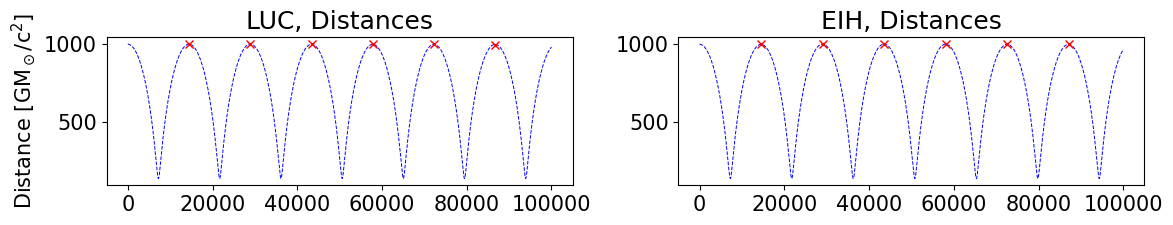

In [63]:
x = range(len(rs_N))

fig, axs = plt.subplots(1,2, figsize=(12,2.5), sharex = False, sharey = False)

# axs[0,0].set_aspect('equal', adjustable='datalim')
axs[0].plot(x, rs_LUC, 'b--', lw=0.7)
axs[0].set_title('LUC, Distances')
# axs[0,0].set_ylim(0, 1200)
# axs[0,0].set_xlabel('Time $\mathrm{[G M_\odot/c^3]}$')
axs[0].set_ylabel('Distance $\mathrm{[G M_\odot/c^2]}$')

# axs[0,1].set_aspect('equal', adjustable='datalim')
axs[1].plot(x, rs_EIH, 'b--', lw=0.7)
axs[1].set_title('EIH, Distances')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())
# axs[0,1].set_xlabel('Time $\mathrm{[G M_\odot/c^2]}$')
# axs[0,1].set_ylabel('Distance $\mathrm{[G M_\odot/c^3]}$')

for i in range(len(peakIndices_LUC)):
    axs[0].plot(peakIndices_LUC[i], rs_EIH[peakIndices_LUC[i]], 'rx')
    axs[1].plot(peakIndices_EIH[i], rs_EIH[peakIndices_EIH[i]], 'rx')
    
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
fig.tight_layout()
# fig.savefig('test body perihelion shift_distances.jpg', dpi=600)


In [64]:
G = const.G
c = const.c

x_1, x_2, v_1, v_2, m_1, m_2 = s

Δφa = perihelionShift_analytical(s, mode = 'EIH', DL=True)
print(f'Δφ (in radians) = {Δφa*np.pi/180:.1f}, Δφ (in angles) = {Δφa:.1f}')
ΔΦa_poul = perihelionShift_analytical(s, mode='2PM', DL=True)
print(f'ΔΦ_poul (in radians) = {ΔΦa_poul*np.pi/180:.1f}, ΔΦ_poul (in angles) = {ΔΦa_poul:.1f}')

Δφ (in radians) = 0.1, Δφ (in angles) = 4.3
ΔΦ_poul (in radians) = 0.1, ΔΦ_poul (in angles) = 4.3


# 3) Similar mass binary system w/ eccentricity

In [86]:
%run ./Functions_All.ipynb
m_1 = b1_mass = 1.7
m_2 = b2_mass = 2

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000


α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

V_eff_EIH = (TotalEnergy(s, mode = 'EIH')[1])
print(f'V_eff_EIH = {V_eff_EIH/(M_sun*c**2):.4e} M_sun*c**2 = {V_eff_EIH:.4e}')


N =  α*6# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e6
dt = t_max/res

positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH', DL=True)[1]
positions_LUC = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'LUC', DL=True)[1]
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

V_eff_EIH = -2.0721e-47 s2 / (kg m2) M_sun*c**2 = -3.7030e+00


C:\Users\Productivity\AppData\Local\Temp\ipykernel_24104\2281194048.py:16: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


meanEccentricity_EIH = 0.617


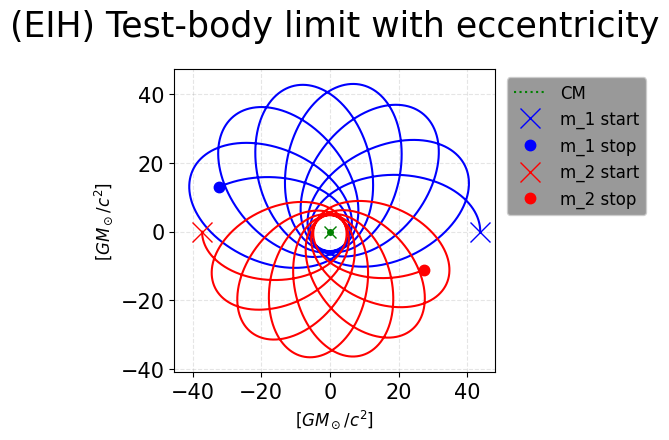

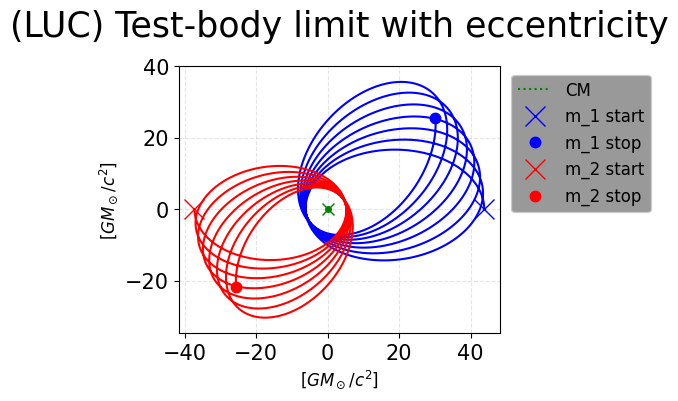

In [87]:
eccOutput_EIH = eccentricity(positions_EIH[0])
print(f'meanEccentricity_EIH = {eccOutput_EIH[0]:.3f}')
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_EIH, CM = True, xlim=lim, ylim=lim, filename='(EIH) Test-body limit with eccentricity', save=False, figsize=(6,6))
orbPlotter(positions_LUC, CM = True, xlim=lim, ylim=lim, filename='(LUC) Test-body limit with eccentricity', save=False, figsize=(6,6))


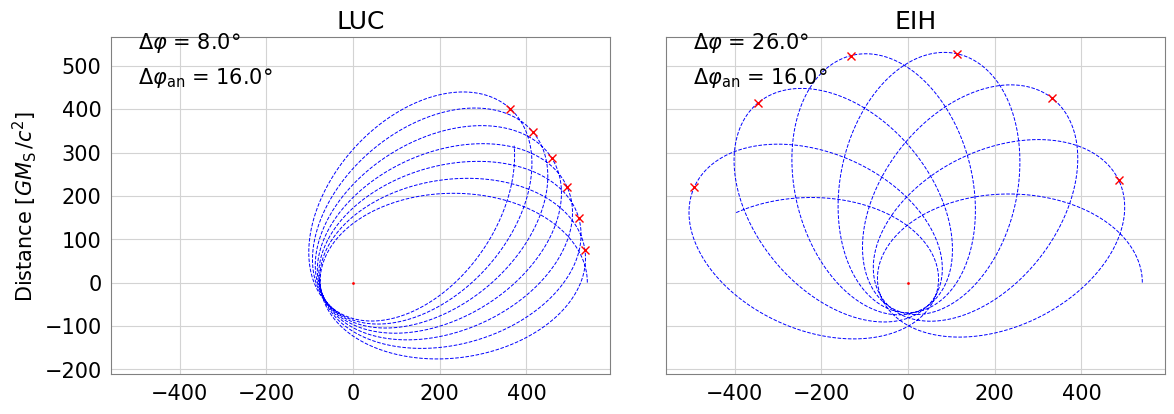

In [89]:
φ_EIH_an = perihelionShift_analytical(s, DL=True, mode='EIH')

rs_EIH, peakIndices_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0])
rs_LUC, peakIndices_LUC, peakPositions_LUC, peakAngles_LUC, perihelionShift_LUC = perihelionShift(positions_LUC[0]) 
   

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(1,2, figsize=(12,8), sharex = True, sharey = True)

axs[0].set_aspect('equal')
axs[0].plot(positions_LUC[0,0], positions_LUC[0,1], 'b--', lw=0.7)
axs[0].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_LUC*180/np.pi:.1f}°')
axs[0].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_EIH_an:.1f}°')
axs[0].plot(0,0,'r.', markersize=2)
axs[0].set_title('LUC')
axs[0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0].legend(loc=(-0.08, 0.82), frameon=False)

axs[1].set_aspect('equal')
axs[1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[1].plot(0,0,'w.', markersize=1, label=f'$Δφ$ = {perihelionShift_EIH*180/np.pi:.1f}°')
axs[1].plot(0,0,'w.', markersize=1, label='$Δφ_\mathrm{an}$ = '+f'{φ_EIH_an:.1f}°')
axs[1].plot(0,0,'r.', markersize=2)
axs[1].set_title('EIH')
axs[1].legend(loc=(-0.08, 0.82), frameon=False)

for i in range(len(peakPositions_LUC)):
    axs[0].plot(peakPositions_LUC[i,0], peakPositions_LUC[i,1], 'rx')
    axs[1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('test body perihelion shift.jpg', dpi=300)


# SCATTERING

In [65]:
m_1 = 1e-6
m_2 = 5

x_1 = np.array([-1e4, 500.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.9,   0.])
v_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)


t_max = 2e4
res = 1e7
dt = t_max/res

positions_LUC = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'LUC', DL=True)[1]
positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH', DL=True)[1]



# For the graph in the paper
# m_1 = 1e-6
# m_2 = 5

# R_S = 2*(m_1 + m_2)

# x_1 = np.array([-3e3, 400.])
# x_2 = np.array([0.,    0.])
# v_1 = np.array([0.4,   0.])
# v_2 = np.array([0.,    0.])

In [66]:
V_eff_EIH= TotalEnergy(s, mode = 'EIH', DL=True)[1]
print(f'V_eff_EIH = {V_eff_EIH:.2e}')

V_eff_EIH = -5.00e+00


In [67]:
θ_EIH = scatteringAngle_analytical(s, mode = 'EIH', DL=True)[0]

θ_EIH

0.0

θ_LUC = 7.76°
θ_EIH = 179.99°


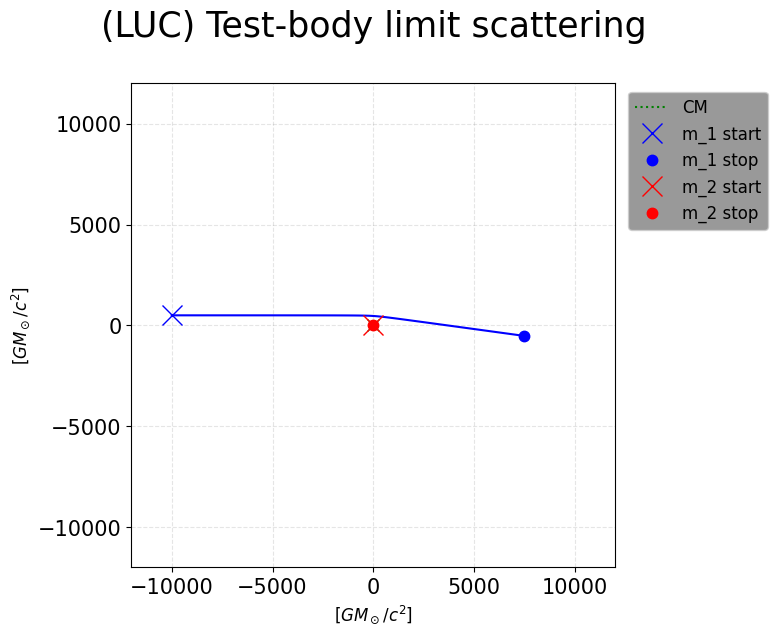

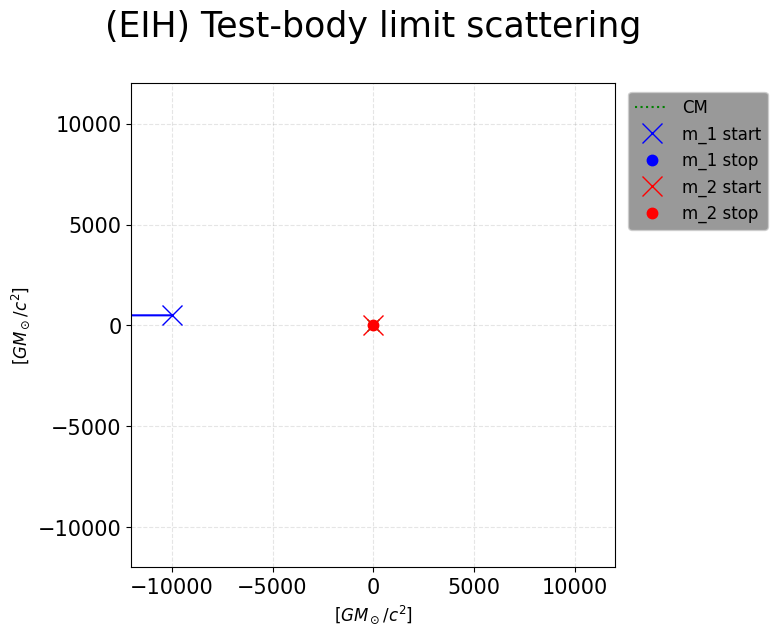

In [68]:
lim = 1.2e4
# lims = 0
lims = (-lim,lim)
orbPlotter(positions_LUC, CM = True, filename='(LUC) Test-body limit scattering', xlim=lims, ylim=lims, slice = S, save=False)
orbPlotter(positions_EIH, CM = True, filename='(EIH) Test-body limit scattering', xlim=lims, ylim=lims, slice = S, save=False)

print(f'θ_LUC = {scatteringAngle(positions_LUC):.2f}°')
print(f'θ_EIH = {scatteringAngle(positions_EIH):.2f}°')

NameError: name 'positions_1PM' is not defined

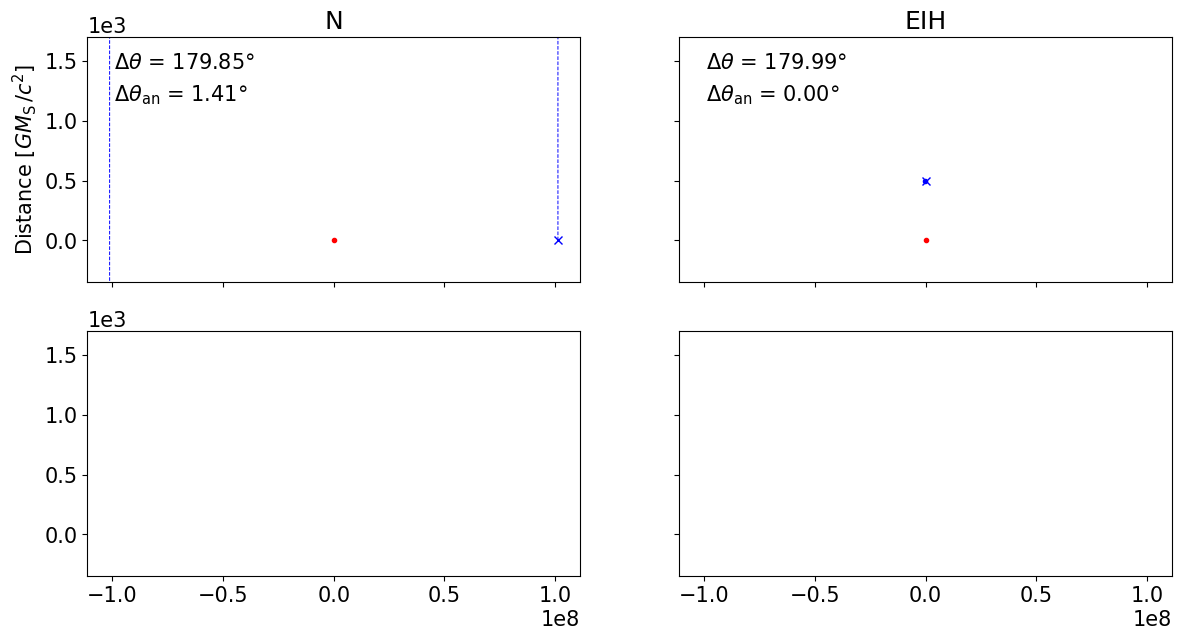

In [69]:
θ_N_an = scatteringAngle_analytical(s, DL=True, mode = 'N')
θ_EIH_an = scatteringAngle_analytical(s, DL=True, mode = 'EIH')
θ_1PM_an = scatteringAngle_analytical(s, DL=True, mode = '1PM')
θ_2PM_an = scatteringAngle_analytical(s, DL=True, mode = '2PM')

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, axs = plt.subplots(2,2, figsize=(14,7), sharex = True, sharey = True)


axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_N):.2f}°')
axs[0,0].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_N_an[0]:.2f}°')
axs[0,0].plot(0,0,'r.')
axs[0,0].plot(positions_N[0,0][-1], positions_N[0,1][-1], 'b.')
axs[0,0].plot(positions_N[0,0][0], positions_N[0,1][0], 'bx')
axs[0,0].set_title('N')
axs[0,0].set_ylim(-350, 1700)
axs[0,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[0,0].ticklabel_format(scilimits=(0,2))
axs[0,0].legend(loc=(-0.08, 0.68), frameon=False)


axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_EIH):.2f}°')
axs[0,1].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_EIH_an[0]:.2f}°')
axs[0,1].plot(0,0,'r.')
axs[0,1].plot(positions_EIH[0,0][-1], positions_EIH[0,1][-1], 'b.')
axs[0,1].plot(positions_EIH[0,0][0], positions_EIH[0,1][0], 'bx')
axs[0,1].set_title('EIH')
axs[0,1].legend(loc=(-0.08, 0.68), frameon=False)

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_1PM):.2f}°')
axs[1,0].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_1PM_an[0]:.2f}°')
axs[1,0].plot(0,0,'r.')
axs[1,0].plot(positions_1PM[0,0][-1], positions_1PM[0,1][-1], 'b.')
axs[1,0].plot(positions_1PM[0,0][0], positions_1PM[0,1][0], 'bx')
axs[1,0].set_title('1PM')
axs[1,0].set_ylabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,0].ticklabel_format(scilimits=(0,2))
axs[1,0].legend(loc=(-0.08, 0.68), frameon=False)

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'w.', markersize=1, label=f'$Δθ$ = {scatteringAngle(positions_2PM):.2f}°')
axs[1,1].plot(0,0,'w.', markersize=1, label='$Δθ_\mathrm{an}$ = '+f'{θ_2PM_an[0]:.2f}°')
axs[1,1].plot(0,0,'r.')
axs[1,1].plot(positions_2PM[0,0][-1], positions_2PM[0,1][-1], 'b.')
axs[1,1].plot(positions_2PM[0,0][0], positions_2PM[0,1][0], 'bx')
axs[1,1].set_title('2PM')
axs[1,1].set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
axs[1,1].ticklabel_format(scilimits=(0,2))
axs[1,1].legend(loc=(-0.08, 0.68), frameon=False)

# for i in range(len(peakPositions_EIH)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')

axs = axs.flatten()

for ax in axs:
    ax.spines['top'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.grid(color='lightgray')

fig.tight_layout()

# fig.savefig('test body scattering 2.jpg', dpi=300)


In [ ]:
m_1 = 1e-6
m_2 = 1

R_S = 2*(m_1 + m_2)

x_1 = np.array([-1e4, 400.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.3,   0.])
v_2 = np.array([0.,    0.])
s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)


t_max = 5e4
res = 1e4
dt = t_max/res

leng = 11

θs_N = np.zeros(leng)
θs_N_an = np.zeros(leng)
Ls_N = np.zeros(leng)

θs_EIH = np.zeros(leng)
θs_EIH_an = np.zeros(leng)
Ls_EIH = np.zeros(leng)

θs_1PM = np.zeros(leng)
θs_1PM_an = np.zeros(leng)
Ls_1PM = np.zeros(leng)

θs_2PM = np.zeros(leng)
θs_2PM_an = np.zeros(leng)
Ls_2PM = np.zeros(leng)


for i in range(leng):
    v_1 = np.array([0.3,   0.])
    v_1 += np.array([0.03*i, 0])
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2
    s_cm = sToCOM(s)

    positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N', DL=True)[1]
    positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH', DL=True)[1]
    positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM', DL=True)[1]
    positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM', DL=True)[1]

    θs_N[i] = scatteringAngle(positions_N)
    θs_N_an[i], Ls_N[i] = scatteringAngle_analytical(s, mode ='N', DL=True)

    θs_EIH[i] = scatteringAngle(positions_EIH)
    Ls_EIH[i] = scatteringAngle_analytical(s, mode ='N', DL=True)[1]

    θs_1PM[i] = scatteringAngle(positions_1PM)
    θs_1PM_an[i], Ls_1PM[i] = scatteringAngle_analytical(s, mode ='1PM', DL=True)

    θs_2PM[i] = scatteringAngle(positions_2PM)
    θs_2PM_an[i], Ls_2PM[i] = scatteringAngle_analytical(s, mode ='2PM', DL=True)

# 5m 5s at res = 3e4


[0.3 0. ]
[0.33 0.  ]


C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:27: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:56: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:97: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))


[0.36 0.  ]
[0.39 0.  ]
[0.42 0.  ]
[0.45 0.  ]
[0.48 0.  ]
[0.51 0.  ]
[0.54 0.  ]
[0.57 0.  ]
[0.6 0. ]


In [ ]:
m_1 = 1e-6
m_2 = 1

R_S = 2*(m_1 + m_2)

x_1 = np.array([-1e4, 400.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.3,   0.])
v_2 = np.array([0.,    0.])
s = x_1, x_2, v_1, v_2, m_1, m_2


t_max = 5e4
res = 1e4
dt = t_max/res

leng = 11

θ_test = np.zeros(leng)


for i in range(leng):
    v_1 = np.array([0.3,   0.])
    v_1 += np.array([0.03*i, 0])
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2

[0.3 0. ]


UnitConversionError: Can only apply 'subtract' function to quantities with compatible dimensions

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,6), sharex = True, sharey = True)


axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].plot(0,0,'r.')
axs[0,0].plot(positions_N[0,0][-1], positions_N[0,1][-1], 'bo')
axs[0,0].plot(positions_N[0,0][0], positions_N[0,1][0], 'bx')
axs[0,0].set_title(f'θ_Newtonian = {scatteringAngle(positions_N):.2f}°')
axs[0,0].set_ylim(-350, 1700)

axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'r.')
axs[0,1].plot(positions_EIH[0,0][-1], positions_EIH[0,1][-1], 'bo')
axs[0,1].plot(positions_EIH[0,0][0], positions_EIH[0,1][0], 'bx')
axs[0,1].set_title(f'θ_EIH = {scatteringAngle(positions_EIH):.2f}°')

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'r.')
axs[1,0].plot(positions_1PM[0,0][-1], positions_1PM[0,1][-1], 'bo')
axs[1,0].plot(positions_1PM[0,0][0], positions_1PM[0,1][0], 'bx')
axs[1,0].set_title(f'θ_1PM = {scatteringAngle(positions_1PM):.2f}°')

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'r.')
axs[1,1].plot(positions_2PM[0,0][-1], positions_2PM[0,1][-1], 'bo')
axs[1,1].plot(positions_2PM[0,0][0], positions_2PM[0,1][0], 'bx')
axs[1,1].set_title(f'θ_2PM = {scatteringAngle(positions_2PM):.2f}°')
# for i in range(len(peakPositions_EIH)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
fig.tight_layout()


In [ ]:
x = np.linspace(Ls_N[0], Ls_N[-1], 11)
ones = np.ones_like(x)
fig, axs = plt.subplots(2,1, figsize=(12,12), sharex = True, sharey=True)
axs[0].plot(Ls_N, θs_N, 'y', label='N'), axs[0].plot(Ls_EIH, θs_EIH,'g', label='EIH'), axs[0].plot(Ls_1PM, θs_1PM, 'b', label='1PM'), axs[0].plot(Ls_2PM, θs_2PM, 'r', label='2PM')
axs[0].plot(x,ones, 'k:', lw=0.5, label='θ = 1.0')
# axs[0].set_xlabel('Angular momentum L [kg m^2/s]')
axs[0].set_ylabel('Scattering angle θ [°]')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend()
axs[0].set_title('θ(L) - Simulated')


axs[1].plot(Ls_N, θs_N_an,'y--', label='N_an'), axs[1].plot(Ls_1PM, θs_1PM_an, 'b--', label='1PM_an'), axs[1].plot(Ls_2PM, θs_2PM_an, 'r--', label='2PM_an'), axs[1].plot(Ls_2PM, θ_test, 'k--', label='test')
axs[1].plot(x,ones, 'k:' , lw=0.5, label='θ = 1.0')
axs[1].set_xlabel('Angular momentum L [kg m^2/s]')
axs[1].set_ylabel('Scattering angle θ [°]')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend()
axs[1].set_title('θ(L) - Analytical')

fig.tight_layout()
# fig.savefig('Scattering angle of L multiplot.jpg', dpi=300)